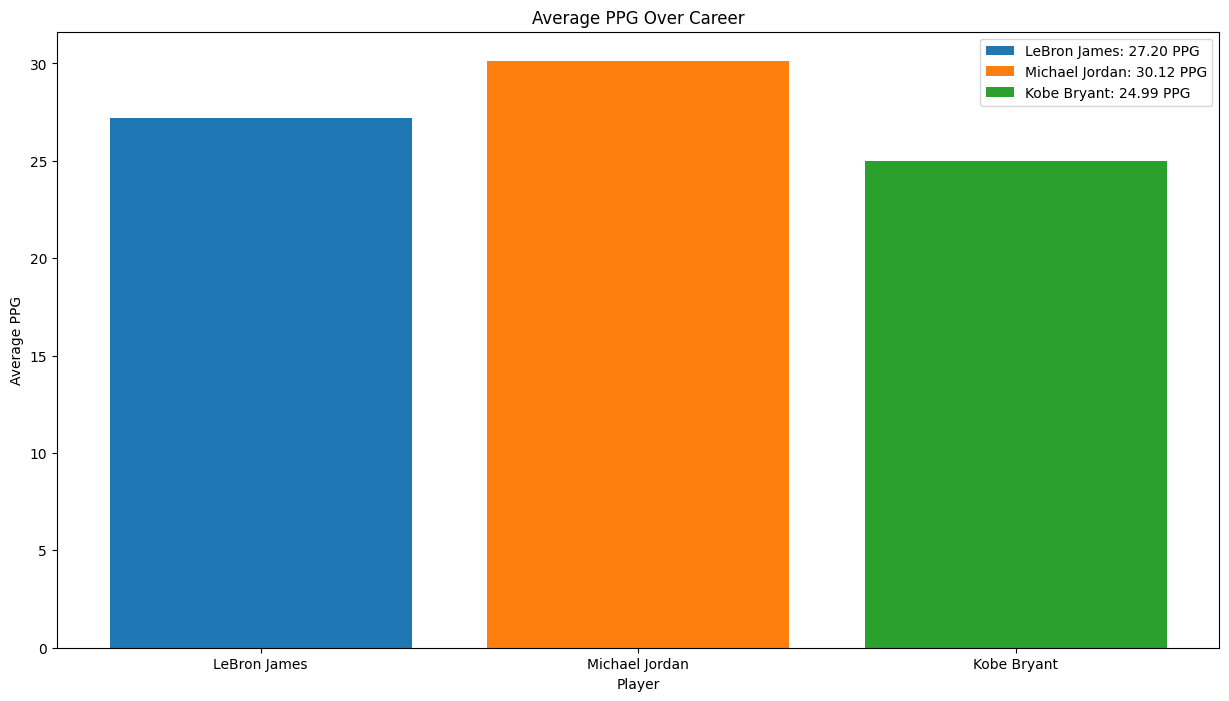

In [1]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]

# Fetch their career data
all_data = {}
for player_name in player_names:
    all_data[player_name] = get_player_career_data(player_name)

# Function to calculate average PPG for each season
def calculate_total_points_for_season(player_data):
    return player_data['Stats']['PTS'].mean()

def calculate_avg_ppg(player_data):
    total_points = player_data['Stats']['PTS'].sum()
    total_games = player_data['Stats']['GP'].sum()
    if total_games == 0:
        return 0
    return total_points / total_games


# Calculate average PPG
avg_ppg_data = {}
for player_name, data in all_data.items():
    avg_ppg_data[player_name] = calculate_avg_ppg(data)

# Plotting
plt.figure(figsize=(15, 8))
seasons = range(1, len(player_names) + 1)

for player_name, avg_ppg in avg_ppg_data.items():
    plt.bar(player_name, avg_ppg, label=f"{player_name}: {avg_ppg:.2f} PPG")

plt.title("Average PPG Over Career")
plt.xlabel("Player")
plt.ylabel("Average PPG")
plt.legend()
plt.show()


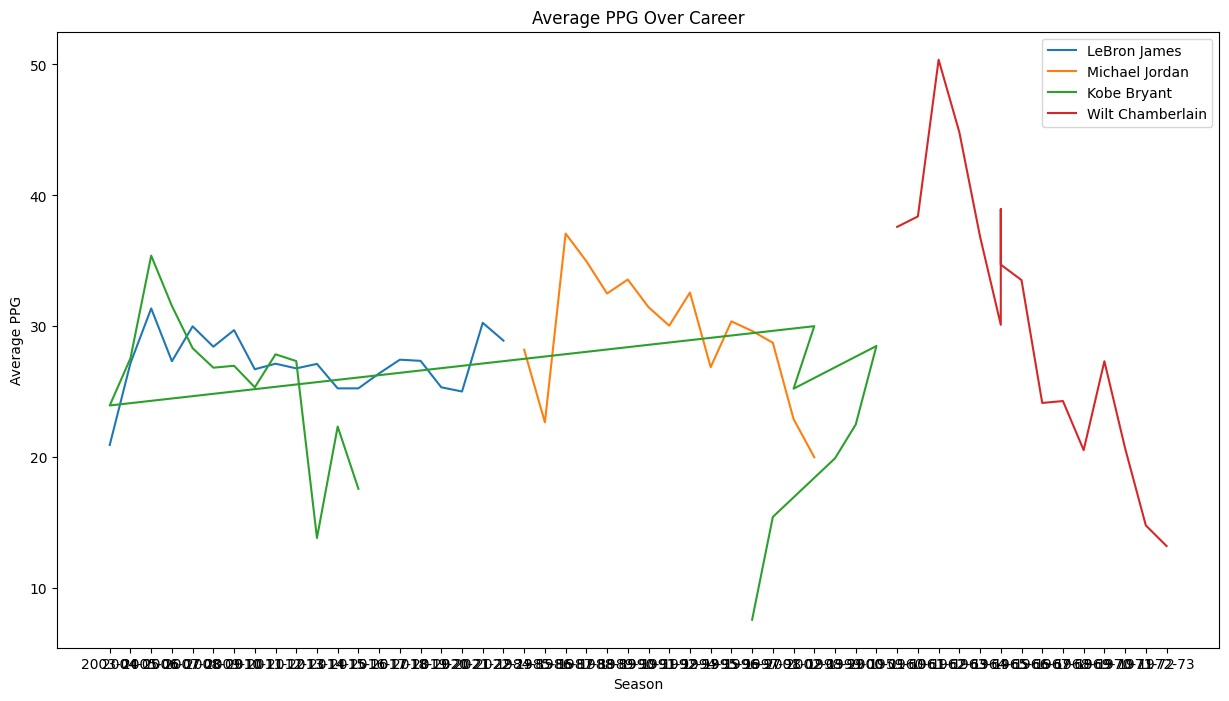

In [53]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant", "Wilt Chamberlain"]

# Fetch their career data
all_data = {}
for player_name in player_names:
    all_data[player_name] = get_player_career_data(player_name)

# Function to calculate average PPG for each season
def calculate_avg_ppg_for_season(player_data):
    player_data['avg_ppg'] = player_data['Stats']['PTS'] / player_data['Stats']['GP']
    return player_data[['General Info', 'avg_ppg']]

# Plotting
plt.figure(figsize=(15, 8))

for player_name, data in all_data.items():
    avg_ppg_for_season = calculate_avg_ppg_for_season(data)
    plt.plot(avg_ppg_for_season['General Info']['SEASON_ID'], avg_ppg_for_season['avg_ppg'], label=f"{player_name}")

plt.title("Average PPG Over Career")
plt.xlabel("Season")
plt.ylabel("Average PPG")
plt.legend()
plt.show()



                             avg_ppg
                                    
(General Info, SEASON_ID)           
1959-60                    37.597222
1960-61                    38.392405
1961-62                    50.362500
1962-63                    44.825000
1963-64                    36.850000
1964-65                    30.114286
1964-65                    38.947368
1964-65                    34.712329
1965-66                    33.531646
1966-67                    24.148148
1967-68                    24.292683
1968-69                    20.543210
1969-70                    27.333333
1970-71                    20.682927
1971-72                    14.792683
1972-73                    13.219512
1984-85                     0.000000
1985-86                     0.000000
1986-87                     0.000000
1987-88                     0.000000
1988-89                     0.000000
1989-90                     0.000000
1990-91                     0.000000
1991-92                     0.000000
1

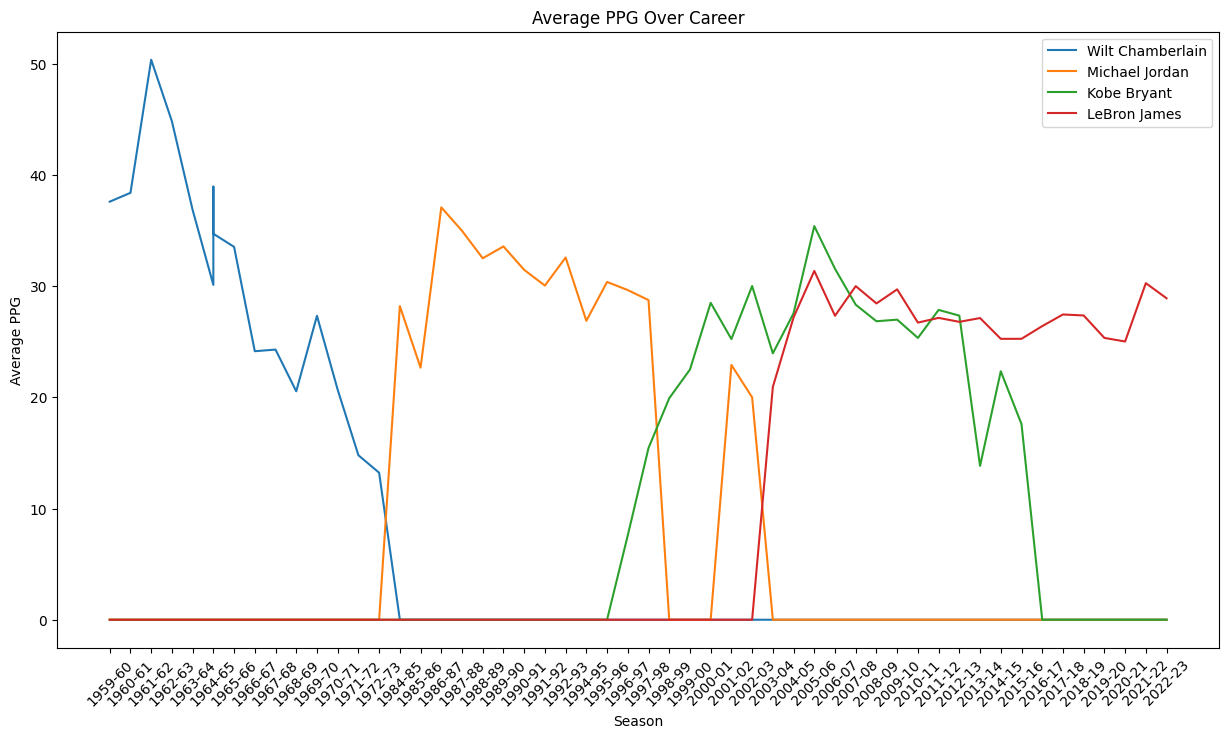

In [51]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant", "Wilt Chamberlain"]

# Fetch their career data
all_data = {}
for player_name in player_names:
    all_data[player_name] = get_player_career_data(player_name)

# Sort players by their first season
sorted_players = sorted(player_names, key=lambda x: all_data[x]['General Info']['SEASON_ID'].min())


###

# Define a list of all possible seasons between the first and last seasons across all players
all_seasons = []
for player_name in sorted_players:
    all_seasons.extend(all_data[player_name]['General Info']['SEASON_ID'].tolist())
all_seasons = sorted(list(set(all_seasons)))

# # Update function to calculate average PPG for each season
# def calculate_avg_ppg_for_season(player_data, all_seasons):
#     player_data['avg_ppg'] = player_data['Stats']['PTS'] / player_data['Stats']['GP']
#     ppg_data = player_data.set_index('General Info')['SEASON_ID']['avg_ppg']
    
#     # Fill in missing seasons with 0
#     for season in all_seasons:
#         if season not in ppg_data.index:
#             ppg_data.loc[season] = 0.0
    
#     ppg_data = ppg_data.sort_index()
#     return ppg_data

# Update function to calculate average PPG for each season
def calculate_avg_ppg_for_season(player_data, all_seasons):
    player_data['avg_ppg'] = player_data[('Stats', 'PTS')] / player_data[('Stats', 'GP')]
    
    # Extract the SEASON_IDs and avg_ppg into a new DataFrame
    ppg_data = player_data[[('General Info', 'SEASON_ID'), ('avg_ppg', '')]].copy()
    ppg_data.set_index(('General Info', 'SEASON_ID'), inplace=True)
    
    # Fill in missing seasons with 0
    for season in all_seasons:
        if season not in ppg_data.index:
            ppg_data.loc[season] = 0.0
    
    ppg_data = ppg_data.sort_index()
    return ppg_data


# Plotting
plt.figure(figsize=(15, 8))

for player_name in sorted_players:
    data = all_data[player_name]
    avg_ppg_for_season = calculate_avg_ppg_for_season(data, all_seasons)
    print(avg_ppg_for_season)
    plt.plot(avg_ppg_for_season.index, avg_ppg_for_season.values, label=f"{player_name}")

plt.title("Average PPG Over Career")
plt.xlabel("Season")
plt.ylabel("Average PPG")
plt.xticks(rotation=45)  # Rotate x-axis labels to make them less cluttered
plt.legend()
plt.show()



In [55]:
all_data

{'LeBron James':    General Info                                                        Stats  \
       PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION PLAYER_AGE   
 0          2544   2003-04        00  1610612739               CLE       19.0   
 1          2544   2004-05        00  1610612739               CLE       20.0   
 2          2544   2005-06        00  1610612739               CLE       21.0   
 3          2544   2006-07        00  1610612739               CLE       22.0   
 4          2544   2007-08        00  1610612739               CLE       23.0   
 5          2544   2008-09        00  1610612739               CLE       24.0   
 6          2544   2009-10        00  1610612739               CLE       25.0   
 7          2544   2010-11        00  1610612748               MIA       26.0   
 8          2544   2011-12        00  1610612748               MIA       27.0   
 9          2544   2012-13        00  1610612748               MIA       28.0   
 10         


## the reason I did this is because the graph looks weird for 1964-65 season for Wilt Chamberlain
- it turns out that he was traded from the warriors to the 76-ers, so he has 3 rows for that season
- 1 for each team, and 1 for "TOT" (TOTAL)

In [56]:
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# Wilt Chamberlain
career = PlayerCareerStats(player_id='76375') 

# Get career statistics as a dictionary
career_dict = career.get_dict()

# Extract the data and headers from the response dictionary
data = career_dict['resultSets'][0]['rowSet']
headers = career_dict['resultSets'][0]['headers']

# Create a DataFrame using the data and headers
career_data = pd.DataFrame(data, columns=headers)

In [57]:
career_data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76375,1959-60,00,1610612744,PHW,23.0,72,None,3338.0,1065,...,0.582,None,None,1941,168,None,None,None,150,2707
1,76375,1960-61,00,1610612744,PHW,24.0,79,None,3773.0,1251,...,0.504,None,None,2149,148,None,None,None,130,3033
2,76375,1961-62,00,1610612744,PHW,25.0,80,None,3882.0,1597,...,0.613,None,None,2052,192,None,None,None,123,4029
3,76375,1962-63,00,1610612744,SFW,26.0,80,None,3806.0,1463,...,0.593,None,None,1946,275,None,None,None,136,3586
4,76375,1963-64,00,1610612744,SFW,27.0,80,None,3689.0,1204,...,0.531,None,None,1787,403,None,None,None,182,2948
5,76375,1964-65,00,1610612755,PHL,28.0,35,None,1558.0,427,...,0.526,None,None,780,133,None,None,None,70,1054
6,76375,1964-65,00,1610612744,SFW,28.0,38,None,1743.0,636,...,0.416,None,None,893,117,None,None,None,76,1480
7,76375,1964-65,00,0,TOT,28.0,73,None,3301.0,1063,...,0.464,None,None,1673,250,None,None,None,146,2534
8,76375,1965-66,00,1610612755,PHL,29.0,79,None,3737.0,1074,...,0.513,None,None,1943,414,None,None,None,171,2649
9,76375,1966-67,00,1610612755,PHL,30.0,81,None,3682.0,785,...,0.441,None,None,1957,630,None,None,None,143,1956
